In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np

df = pd.read_csv('train.csv')
print(display(df.describe()))

df_drop_dup = df.drop_duplicates()
print(display(df_drop_dup.describe()))


print(f'The sum of duplicat - {df.duplicated().sum()}')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


None


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


None
The sum of duplicat - 0


In [ ]:
# Для подсчёта пропусков по столбцам:
print(display(df.isnull().sum()))
print(df['Age'].isnull().sum())
print(df['Cabin'].isnull().sum())
print(df['Embarked'].isnull().sum())


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


None
0
687
2


In [ ]:
# removal

df_dropna = df.dropna()
print(display(df_dropna.isnull().sum()))


# filling with a 0

df_fillna = df.fillna(0)
print(display(df_fillna.isnull().sum()))




,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
...,...
Title_Mrs,0
Title_Ms,0
Title_Rev,0
Title_Sir,0


None


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
...,...
Title_Mrs,0
Title_Ms,0
Title_Rev,0
Title_Sir,0


None


In [ ]:
# # SimpleImputer exemple


# import numpy as np
# from sklearn.impute import SimpleImputer # Ensure SimpleImputer is imported

# # Filling with a mean
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# df['Age'] = imputer.fit_transform(df[['Age']])

# display(df.isnull().sum())



,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#EX3
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Загрузи датасет Titanic
df = pd.read_csv('/content/train.csv')

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Capt', 'Sir', 'Lady', 'Countess', 'Jonkheer', 'Don'], 'Rare')

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df = pd.get_dummies(df, columns=['Title', 'Embarked'], prefix=['Title', 'Embarked'], drop_first=True)

df['Age'].fillna(df['Age'].mean(), inplace=True)

scaler = StandardScaler()
df[['Age', 'Fare', 'FamilySize']] = scaler.fit_transform(df[['Age', 'Fare', 'FamilySize']])

print("Результат после Feature Engineering (первые 5 строк):")
display(df.head())


Результат после Feature Engineering (первые 5 строк):


<ipython-input-193-04b9c77ffd1e>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
<ipython-input-193-04b9c77ffd1e>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,-0.592481,1,0,A/5 21171,-0.502445,NaN,0.059160,False,True,False,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.638789,1,0,PC 17599,0.786845,C85,0.059160,False,False,True,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,-0.284663,0,0,STON/O2. 3101282,-0.488854,NaN,-0.560975,True,False,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.407926,1,0,113803,0.420730,C123,0.059160,False,False,True,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0,0.407926,0,0,373450,-0.486337,NaN,-0.560975,False,True,False,False,False,True


Number of outliers in Fare: 116
Outliers in Fare (first 5 rows):
    PassengerId                                               Name      Fare
1             2  Cumings, Mrs. John Bradley (Florence Briggs Th...   71.2833
27           28                     Fortune, Mr. Charles Alexander  263.0000
31           32     Spencer, Mrs. William Augustus (Marie Eugenie)  146.5208
34           35                            Meyer, Mr. Edgar Joseph   82.1708
52           53           Harper, Mrs. Henry Sleeper (Myna Haxtun)   76.7292

Number of outliers in Age: 66
Outliers in Age (first 5 rows):
    PassengerId                              Name   Age
7             8    Palsson, Master. Gosta Leonard   2.0
11           12          Bonnell, Miss. Elizabeth  58.0
15           16  Hewlett, Mrs. (Mary D Kingcome)   55.0
16           17              Rice, Master. Eugene   2.0
33           34             Wheadon, Mr. Edward H  66.0

Fare statistics before capping:
count    891.000000
mean      32.204208
s

<ipython-input-2-5789076ac782>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-2-5789076ac782>:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

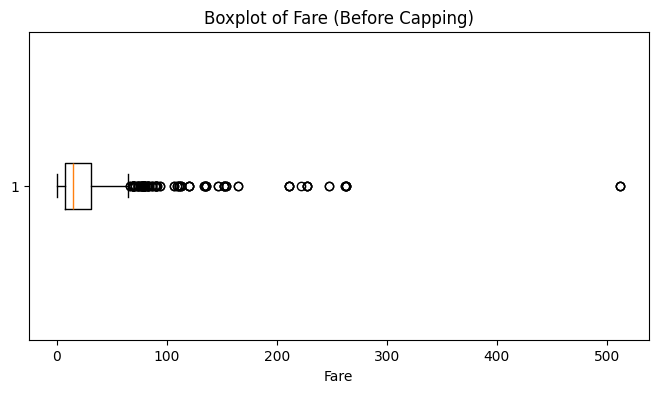

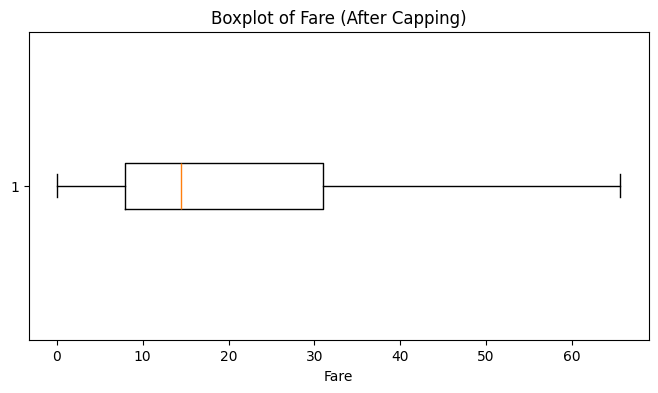

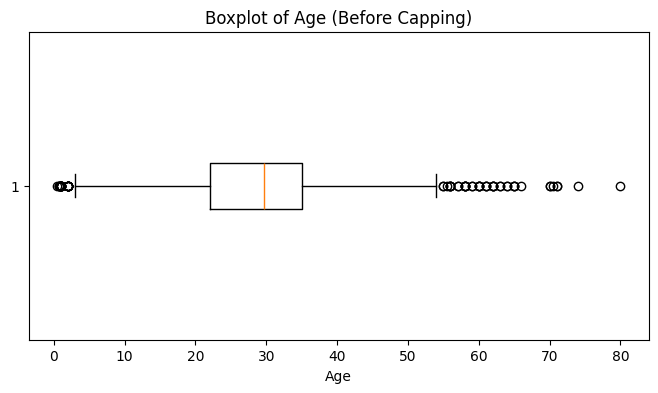

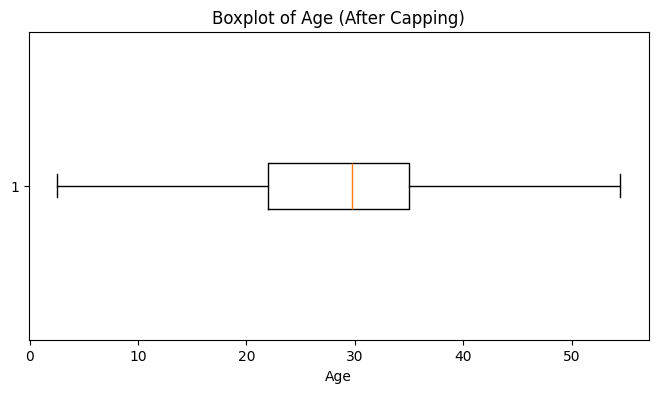

In [ ]:
#ex4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = pd.read_csv('/content/train.csv')

# Fill missing Age values with the mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Function to detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers in Fare
outliers_fare, lower_bound_fare, upper_bound_fare = detect_outliers(df, 'Fare')
print(f"Number of outliers in Fare: {len(outliers_fare)}")
print("Outliers in Fare (first 5 rows):")
print(outliers_fare[['PassengerId', 'Name', 'Fare']].head())

# Detect outliers in Age
outliers_age, lower_bound_age, upper_bound_age = detect_outliers(df, 'Age')
print(f"\nNumber of outliers in Age: {len(outliers_age)}")
print("Outliers in Age (first 5 rows):")
print(outliers_age[['PassengerId', 'Name', 'Age']].head())

# Cap outliers in Fare and Age
df['Fare'] = df['Fare'].clip(lower=lower_bound_fare, upper=upper_bound_fare)
df['Age'] = df['Age'].clip(lower=lower_bound_age, upper=upper_bound_age)

# Load original dataset for comparison
df_original = pd.read_csv('/content/train.csv')
df_original['Age'].fillna(df_original['Age'].mean(), inplace=True)

# Compare Fare statistics before and after capping
print("\nFare statistics before capping:")
print(df_original['Fare'].describe())
print("\nFare statistics after capping:")
print(df['Fare'].describe())

# Compare Age statistics before and after capping
print("\nAge statistics before capping:")
print(df_original['Age'].describe())
print("\nAge statistics after capping:")
print(df['Age'].describe())

# Visualize Fare with boxplots
plt.figure(figsize=(8, 4))
plt.boxplot(df_original['Fare'].dropna(), vert=False)
plt.title('Boxplot of Fare (Before Capping)')
plt.xlabel('Fare')
plt.show()

plt.figure(figsize=(8, 4))
plt.boxplot(df['Fare'], vert=False)
plt.title('Boxplot of Fare (After Capping)')
plt.xlabel('Fare')
plt.show()

# Visualize Age with boxplots
plt.figure(figsize=(8, 4))
plt.boxplot(df_original['Age'], vert=False)
plt.title('Boxplot of Age (Before Capping)')
plt.xlabel('Age')
plt.show()

plt.figure(figsize=(8, 4))
plt.boxplot(df['Age'], vert=False)
plt.title('Boxplot of Age (After Capping)')
plt.xlabel('Age')
plt.show()


Summary statistics for Age and Fare:
              Age        Fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200


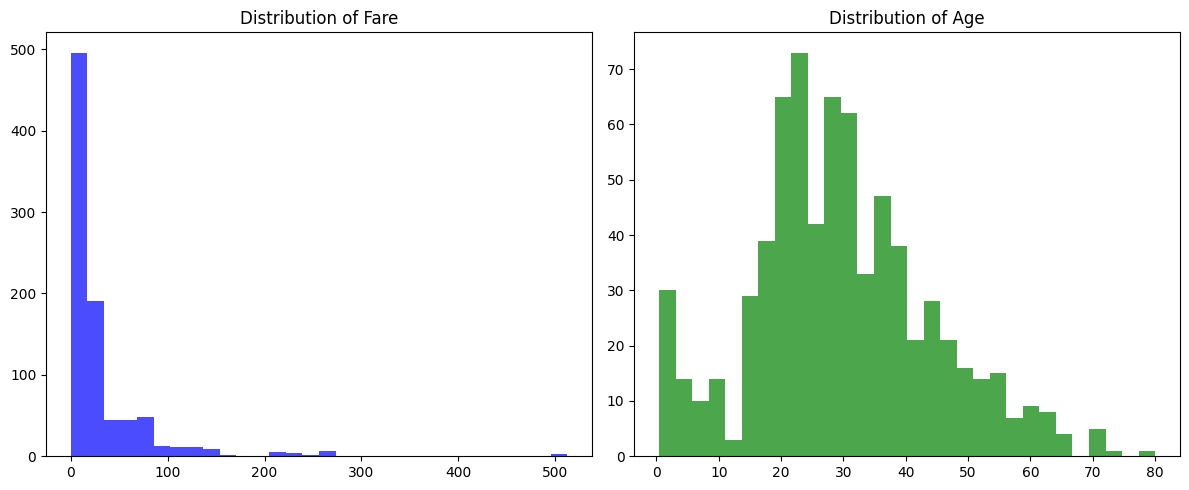

NameError: name 'StandardScaler' is not defined

In [4]:
#EX5

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('train.csv')

# Assess the scale and distribution of numerical columns
print("Summary statistics for Age and Fare:")
print(df[['Age', 'Fare']].describe())

# Visualize the distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Fare'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Fare')

plt.subplot(1, 2, 2)
plt.hist(df['Age'], bins=30, color='green', alpha=0.7)
plt.title('Distribution of Age')

plt.tight_layout()
plt.show()

# Apply normalization to Age (bounded range [0, 1])
scaler_minmax = MinMaxScaler()
df['Age_normalized'] = scaler_minmax.fit_transform(df[['Age']])

# Apply standardization to Fare (wide range of values)
scaler_standard = StandardScaler()
df['Fare_standardized'] = scaler_standard.fit_transform(df[['Fare']])

# Display the first few rows to verify
print("\nFirst few rows after normalization and standardization:")
display(df[['Age', 'Age_normalized', 'Fare', 'Fare_standardized']].head())






In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
print("Categorical columns in the dataset:")
print(df.select_dtypes(include=['object']).columns)
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'], prefix=['Sex', 'Embarked'])
print("\nFirst few rows after one-hot encoding:")
display(df_encoded.head())

Categorical columns in the dataset:
Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

First few rows after one-hot encoding:


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Age_normalized,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0.271174,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0.472229,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.321438,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0.434531,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0.434531,False,True,False,False,True


In [6]:
bins = [0, 12, 18, 30, 50, 80]  # Age ranges: 0-12, 13-18, 19-30, 31-50, 51-80
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df_encoded['Age_Group'] = pd.cut(df_encoded['Age'], bins=bins, labels=labels, include_lowest=True)

# Apply one-hot encoding to the age groups
df_encoded = pd.get_dummies(df_encoded, columns=['Age_Group'], prefix='Age_Group')

# Display the first few rows to verify
print("\nFirst few rows after age group transformation and encoding:")
display(df_encoded.head())


First few rows after age group transformation and encoding:


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_Group_Child,Age_Group_Teen,Age_Group_Young Adult,Age_Group_Adult,Age_Group_Senior
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,...,False,True,False,False,True,False,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,...,True,False,True,False,False,False,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,True,False,False,False,True,False,False,True,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,...,True,False,False,False,True,False,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,...,False,True,False,False,True,False,False,False,True,False
